In [72]:
import os
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from keras import optimizers

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [29]:

X = []
y = []

def label(category):
    if category == 'dog':
        return 1
    else:
        return 0

for p in os.listdir(r"train/"):
    category = p.split(".")[0]
    cat = label(category)
    img = cv2.imread(os.path.join("train/", p), cv2.IMREAD_GRAYSCALE)
    imgResize = cv2.resize(img, dsize = (80, 80))
    X.append(imgResize)
    y.append(cat)

In [45]:
X = np.array(X).reshape(-1,80,80,1)
y = np.array(y)

X = X / 255

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In [50]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20000, 80, 80, 1), (5000, 80, 80, 1), (20000,), (5000,))

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3), strides=2))
model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [69]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 30, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/30
79/79 [==============================] - 188s 2s/step - loss: 0.7585 - accuracy: 0.5159 - val_loss: 0.6988 - val_accuracy: 0.4976
Epoch 2/30
79/79 [==============================] - 208s 3s/step - loss: 0.6704 - accuracy: 0.5978 - val_loss: 0.6564 - val_accuracy: 0.6250
Epoch 3/30
79/79 [==============================] - 216s 3s/step - loss: 0.6365 - accuracy: 0.6521 - val_loss: 0.6193 - val_accuracy: 0.6710
Epoch 4/30
79/79 [==============================] - 224s 3s/step - loss: 0.6115 - accuracy: 0.6802 - val_loss: 0.6952 - val_accuracy: 0.6230
Epoch 5/30
79/79 [==============================] - 219s 3s/step - loss: 0.5818 - accuracy: 0.7082 - val_loss: 0.5351 - val_accuracy: 0.7528
Epoch 6/30
79/79 [==============================] - 222s 3s/step - loss: 0.5341 - accuracy: 0.7494 - val_loss: 0.5178 - val_accuracy: 0.7648
Epoch 7/30
79/79 [==============================] - 217s 3s/step - loss: 0.4917 - accuracy: 0.7788 - val_loss: 0.6260 - val_accuracy: 0.6912
Epoch 8/30
79

In [70]:
_, accuracy = model.evaluate(X_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

157/157 [==============================] - 15s 94ms/step - loss: 0.2452 - accuracy: 0.9070
Accuracy: 90.70


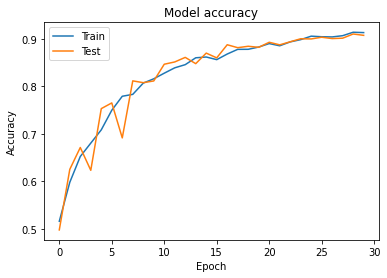

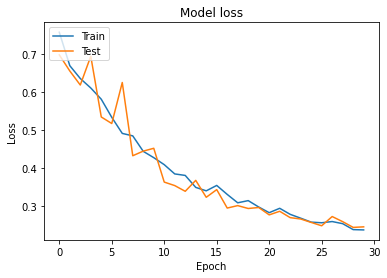

In [71]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()